# Quantum Teleportation experiment

## Imports and setting up the backend

In [1]:
from qiskit import *
from qiskit_ibm_provider import IBMProvider

In [2]:
provider = IBMProvider()

In [27]:
provider.backends(simulator=True, operational=True)

[<IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('simulator_stabilizer')>]

In [3]:
backend = provider.get_backend('ibmq_qasm_simulator')

## Creating the Circuit

In [4]:
qr1 = QuantumRegister(1, name = 'Qubit')
qra = QuantumRegister(1, name = 'Alice')
qrb = QuantumRegister(1, name = 'Bob')

cr1 = ClassicalRegister(1, name = 'a')
cr2 = ClassicalRegister(1, name = 'b')
cr3 = ClassicalRegister(1, name = 'Final')

qc = QuantumCircuit(qr1,qra,qrb, cr1, cr2, cr3)

In [5]:
# Set up entanglement in Hadamard
qc.h(qra)
qc.cx(qra,qrb)


In [6]:
#Set up Qubit in Psi format 
qc.barrier()
qc.cx(qr1,qra)
qc.h(qr1)

In [7]:
qc.barrier()
qc.measure(qr1, cr1)  # Classical information 'a'
qc.measure(qra, cr2)  # Classical information 'b'

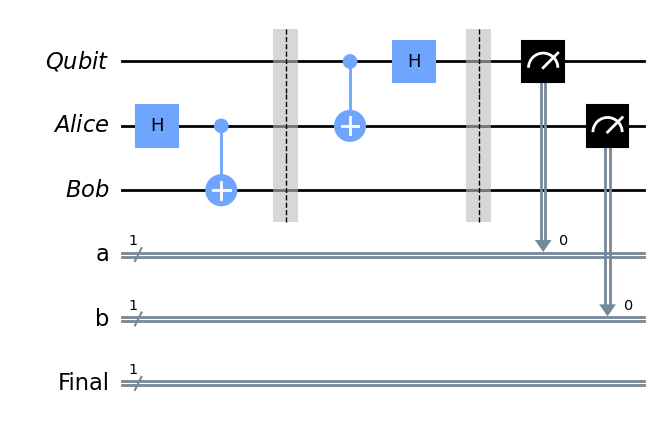

In [8]:
qc.draw('mpl')

In [9]:
qc.z(qrb).c_if(cr1,1)  # If classical rail 'a' is true perform a Phase-flip (+ to -)
qc.x(qrb).c_if(cr2,1)  # If classical rail 'b' is true perform a Bit-flip (0 to 1)

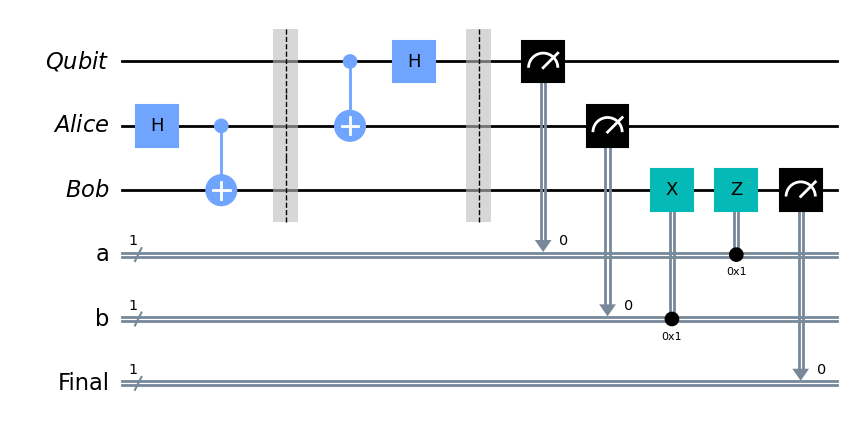

In [10]:
qc.measure(qrb,cr3)
qc.draw('mpl')

In [16]:
job = backend.run(qc, shots = 1000, dynamic = True)

In [17]:
result = job.result()
counts = result.get_counts()

In [18]:
counts

{'0 0 0': 249, '0 1 0': 265, '0 0 1': 232, '0 1 1': 254}

In [19]:
from qiskit.result import marginal_counts

In [28]:
marginal_counts(counts, [2])  # Success!

{'0': 1000}